In [37]:
import os
from matplotlib import pyplot as plt
import numpy as np
from glob import glob

In [38]:
path = r'E:\remote_data\numvis'
data_path = sorted(glob(os.path.join(path, '*.tif')))

In [39]:
data_path

['E:\\remote_data\\numvis\\201408ddyw.tif',
 'E:\\remote_data\\numvis\\201508ddyw.tif',
 'E:\\remote_data\\numvis\\20151017sp.tif',
 'E:\\remote_data\\numvis\\20161025.tif',
 'E:\\remote_data\\numvis\\20170728.tif',
 'E:\\remote_data\\numvis\\20180729.tif',
 'E:\\remote_data\\numvis\\20190828.tif',
 'E:\\remote_data\\numvis\\20200727.tif',
 'E:\\remote_data\\numvis\\20210717.tif']

In [40]:
import cv2
import numpy as np


path = 'E:\\remote_data\\numvis\\201508ddyw.tif'
img = cv2.imread(path, 0)

In [58]:
# 指定阈值（根据您的需求调整）
threshold_value = 125

# 使用cv2.threshold()函数进行二值化
_, binary_image = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# 进行膨胀操作
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

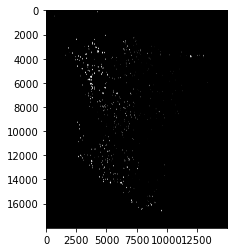

In [49]:
plt.imshow(dilated_image, cmap='gray')

In [62]:
canny_edges = cv2.Canny(img, threshold1=100, threshold2=200)
# 使用高斯模糊来平滑边缘图像
smoothed_edges = cv2.GaussianBlur(canny_edges, (5, 5), 0)
# 使用膨胀和腐蚀来连接边缘
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(canny_edges, kernel, iterations=1)
eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)
# 查找轮廓
contours, _ = cv2.findContours(eroded_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 填充轮廓区域
for contour in contours:
    cv2.fillPoly(eroded_edges, [contour], 255)


In [41]:
img.shape

(18000, 15000)

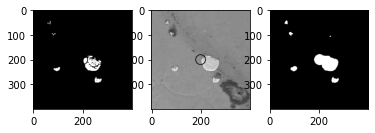

In [63]:
# 定义矩形的参数
center_x = 3625
center_y = 7588
half_height = 200
half_width = 200
radius = 20
color = (0, 0, 255)  # 红色，BGR格式
# 计算矩形的四个角的坐标
top_left = (center_x - half_width, center_y - half_height)
bottom_right = (center_x + half_width, center_y + half_height)
cv2.circle(dilated_image, (center_x, center_y), radius, color, thickness=2)
crop_img = dilated_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
crop_img_raw = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
crop_img_canny = eroded_edges[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
plt.subplot(131)
# show crop image using cv22
plt.imshow(crop_img, cmap='gray')
plt.subplot(132)
# show crop image using cv22
plt.imshow(crop_img_raw, cmap='gray')
plt.subplot(133)
# show crop image using cv22
plt.imshow(crop_img_canny, cmap='gray')

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:701: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x, subok=True, copy=copy)


TypeError: Image data of dtype object cannot be converted to float

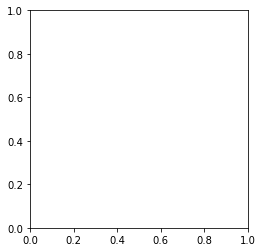

In [34]:
def extract_countour(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = extract_countour(crop_img)
# show contours using plt
plt.imshow(contours)

In [36]:
contours

(array([[[253, 271]],
 
        [[253, 274]],
 
        [[252, 275]],
 
        [[251, 275]],
 
        [[251, 276]],
 
        [[250, 277]],
 
        [[250, 279]],
 
        [[249, 280]],
 
        [[249, 286]],
 
        [[250, 287]],
 
        [[250, 289]],
 
        [[251, 290]],
 
        [[251, 292]],
 
        [[266, 292]],
 
        [[266, 291]],
 
        [[267, 290]],
 
        [[272, 290]],
 
        [[272, 287]],
 
        [[273, 286]],
 
        [[274, 286]],
 
        [[274, 285]],
 
        [[275, 284]],
 
        [[276, 284]],
 
        [[276, 277]],
 
        [[275, 277]],
 
        [[274, 276]],
 
        [[274, 275]],
 
        [[272, 277]],
 
        [[272, 278]],
 
        [[271, 279]],
 
        [[270, 279]],
 
        [[269, 280]],
 
        [[267, 278]],
 
        [[266, 278]],
 
        [[265, 277]],
 
        [[260, 277]],
 
        [[258, 279]],
 
        [[256, 277]],
 
        [[256, 272]],
 
        [[255, 271]]], dtype=int32),
 array([[[258, 281]],
 
   